In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import (
    ImageQuant2,
    bounded_mean_1d,
    direcslist,
    dosage,
    load_image,
    nb_setup,
    raw_data_path,
)

nb_setup()

%matplotlib widget

In [2]:
# Specify paths
path = raw_data_path + "/Imaging/ring_ph"
paths = direcslist(path, 1)
lines = [p.strip("/").split("/")[-2].split("_")[1] for p in paths]
conditions = [p.strip("/").split("/")[-2].split("_")[2] for p in paths]

# Import data
imgs = [load_image(p + "/af_corrected.tif") for p in paths]
rois = [np.loadtxt(p + "/ROI_fit.txt") for p in paths]

# Import quantification model
membg = np.loadtxt("../../data/calibration_mem6.txt")
cytbg = np.loadtxt("../../data/calibration_cyt.txt")
calibration_factor = np.loadtxt("../../data/calibration_constants.txt")[6]
print(calibration_factor)

3.105837611328295


  0%|                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                          | 1/600 [00:00<06:09,  1.62it/s]

  1%|█▏                                                                                                         | 7/600 [00:00<00:47, 12.51it/s]

  2%|██▎                                                                                                       | 13/600 [00:00<00:26, 22.41it/s]

  3%|███▎                                                                                                      | 19/600 [00:00<00:19, 30.37it/s]

  4%|████▍                                                                                                     | 25/600 [00:01<00:15, 37.09it/s]

  5%|█████▍                                                                                                    | 31/600 [00:01<00:13, 42.65it/s]

  6%|██████▌                                                                                                   | 37/600 [00:01<00:11, 47.08it/s]

  7%|███████▌                                                                                                  | 43/600 [00:01<00:11, 50.43it/s]

  8%|████████▋                                                                                                 | 49/600 [00:01<00:10, 52.71it/s]

  9%|█████████▋                                                                                                | 55/600 [00:01<00:10, 54.20it/s]

 10%|██████████▊                                                                                               | 61/600 [00:01<00:09, 55.43it/s]

 11%|███████████▊                                                                                              | 67/600 [00:01<00:09, 56.21it/s]

 12%|████████████▉                                                                                             | 73/600 [00:01<00:09, 56.69it/s]

 13%|█████████████▉                                                                                            | 79/600 [00:01<00:09, 56.99it/s]

 14%|███████████████                                                                                           | 85/600 [00:02<00:09, 56.88it/s]

 15%|████████████████                                                                                          | 91/600 [00:02<00:08, 57.74it/s]

 16%|█████████████████▏                                                                                        | 97/600 [00:02<00:08, 57.50it/s]

 17%|██████████████████                                                                                       | 103/600 [00:02<00:08, 57.55it/s]

 18%|███████████████████                                                                                      | 109/600 [00:02<00:08, 56.86it/s]

 19%|████████████████████▏                                                                                    | 115/600 [00:02<00:08, 56.80it/s]

 20%|█████████████████████▏                                                                                   | 121/600 [00:02<00:08, 57.68it/s]

 21%|██████████████████████▏                                                                                  | 127/600 [00:02<00:08, 58.19it/s]

 22%|███████████████████████▎                                                                                 | 133/600 [00:02<00:07, 58.47it/s]

 23%|████████████████████████▌                                                                                | 140/600 [00:03<00:07, 58.85it/s]

 24%|█████████████████████████▌                                                                               | 146/600 [00:03<00:07, 58.65it/s]

 25%|██████████████████████████▌                                                                              | 152/600 [00:03<00:07, 58.59it/s]

 26%|███████████████████████████▋                                                                             | 158/600 [00:03<00:07, 58.63it/s]

 27%|████████████████████████████▋                                                                            | 164/600 [00:03<00:07, 58.56it/s]

 28%|█████████████████████████████▊                                                                           | 170/600 [00:03<00:07, 58.44it/s]

 29%|██████████████████████████████▊                                                                          | 176/600 [00:03<00:07, 58.56it/s]

 30%|███████████████████████████████▊                                                                         | 182/600 [00:03<00:07, 58.66it/s]

 31%|████████████████████████████████▉                                                                        | 188/600 [00:03<00:07, 58.29it/s]

 32%|█████████████████████████████████▉                                                                       | 194/600 [00:03<00:06, 58.60it/s]

 33%|███████████████████████████████████                                                                      | 200/600 [00:04<00:06, 58.53it/s]

 34%|████████████████████████████████████                                                                     | 206/600 [00:04<00:06, 58.15it/s]

 36%|█████████████████████████████████████▎                                                                   | 213/600 [00:04<00:06, 60.78it/s]

 37%|██████████████████████████████████████▌                                                                  | 220/600 [00:04<00:06, 59.90it/s]

 38%|███████████████████████████████████████▌                                                                 | 226/600 [00:04<00:06, 59.68it/s]

 39%|████████████████████████████████████████▌                                                                | 232/600 [00:04<00:06, 59.15it/s]

 40%|█████████████████████████████████████████▊                                                               | 239/600 [00:04<00:06, 59.44it/s]

 41%|██████████████████████████████████████████▉                                                              | 245/600 [00:04<00:06, 59.05it/s]

 42%|███████████████████████████████████████████▉                                                             | 251/600 [00:04<00:05, 59.25it/s]

 43%|████████████████████████████████████████████▉                                                            | 257/600 [00:04<00:05, 58.98it/s]

 44%|██████████████████████████████████████████████                                                           | 263/600 [00:05<00:05, 58.67it/s]

 45%|███████████████████████████████████████████████                                                          | 269/600 [00:05<00:05, 58.80it/s]

 46%|████████████████████████████████████████████████▏                                                        | 275/600 [00:05<00:05, 58.84it/s]

 47%|█████████████████████████████████████████████████▏                                                       | 281/600 [00:05<00:05, 58.87it/s]

 48%|██████████████████████████████████████████████████▏                                                      | 287/600 [00:05<00:05, 58.84it/s]

 49%|███████████████████████████████████████████████████▎                                                     | 293/600 [00:05<00:05, 58.78it/s]

 50%|████████████████████████████████████████████████████▎                                                    | 299/600 [00:05<00:05, 58.88it/s]

 51%|█████████████████████████████████████████████████████▍                                                   | 305/600 [00:05<00:05, 58.68it/s]

 52%|██████████████████████████████████████████████████████▍                                                  | 311/600 [00:05<00:04, 58.86it/s]

 53%|███████████████████████████████████████████████████████▍                                                 | 317/600 [00:06<00:04, 58.32it/s]

 54%|████████████████████████████████████████████████████████▌                                                | 323/600 [00:06<00:04, 58.64it/s]

 55%|█████████████████████████████████████████████████████████▌                                               | 329/600 [00:06<00:04, 58.54it/s]

 56%|██████████████████████████████████████████████████████████▋                                              | 335/600 [00:06<00:04, 58.59it/s]

 57%|███████████████████████████████████████████████████████████▋                                             | 341/600 [00:06<00:04, 58.63it/s]

 58%|████████████████████████████████████████████████████████████▋                                            | 347/600 [00:06<00:04, 58.26it/s]

 59%|█████████████████████████████████████████████████████████████▊                                           | 353/600 [00:06<00:04, 58.16it/s]

 60%|██████████████████████████████████████████████████████████████▊                                          | 359/600 [00:06<00:04, 58.28it/s]

 61%|███████████████████████████████████████████████████████████████▊                                         | 365/600 [00:06<00:04, 58.49it/s]

 62%|████████████████████████████████████████████████████████████████▉                                        | 371/600 [00:06<00:03, 58.53it/s]

 63%|█████████████████████████████████████████████████████████████████▉                                       | 377/600 [00:07<00:03, 58.80it/s]

 64%|███████████████████████████████████████████████████████████████████                                      | 383/600 [00:07<00:03, 58.81it/s]

 65%|████████████████████████████████████████████████████████████████████                                     | 389/600 [00:07<00:03, 56.54it/s]

 66%|█████████████████████████████████████████████████████████████████████▏                                   | 395/600 [00:07<00:03, 56.09it/s]

 67%|██████████████████████████████████████████████████████████████████████▏                                  | 401/600 [00:07<00:03, 56.94it/s]

 68%|███████████████████████████████████████████████████████████████████████▏                                 | 407/600 [00:07<00:03, 57.42it/s]

 69%|████████████████████████████████████████████████████████████████████████▎                                | 413/600 [00:07<00:03, 57.25it/s]

 70%|█████████████████████████████████████████████████████████████████████████▎                               | 419/600 [00:07<00:03, 57.45it/s]

 71%|██████████████████████████████████████████████████████████████████████████▍                              | 425/600 [00:07<00:03, 58.09it/s]

 72%|███████████████████████████████████████████████████████████████████████████▍                             | 431/600 [00:07<00:02, 58.55it/s]

 73%|████████████████████████████████████████████████████████████████████████████▍                            | 437/600 [00:08<00:02, 58.48it/s]

 74%|█████████████████████████████████████████████████████████████████████████████▌                           | 443/600 [00:08<00:02, 58.72it/s]

 75%|██████████████████████████████████████████████████████████████████████████████▌                          | 449/600 [00:08<00:02, 58.60it/s]

 76%|███████████████████████████████████████████████████████████████████████████████▋                         | 455/600 [00:08<00:02, 58.61it/s]

 77%|████████████████████████████████████████████████████████████████████████████████▋                        | 461/600 [00:08<00:02, 58.76it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████▋                       | 467/600 [00:08<00:02, 58.71it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████▊                      | 473/600 [00:08<00:02, 58.52it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████▊                     | 479/600 [00:08<00:02, 58.39it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████▉                    | 485/600 [00:08<00:01, 58.19it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████▉                   | 491/600 [00:09<00:01, 57.60it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████▉                  | 497/600 [00:09<00:01, 57.83it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████▏                | 504/600 [00:09<00:01, 59.29it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████▎               | 510/600 [00:09<00:01, 58.74it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████▎              | 516/600 [00:09<00:01, 58.63it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████▎             | 522/600 [00:09<00:01, 58.77it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████▍            | 528/600 [00:09<00:01, 58.67it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████▍           | 534/600 [00:09<00:01, 58.50it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████▋          | 541/600 [00:09<00:00, 60.24it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████▉         | 548/600 [00:09<00:00, 60.10it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████▏       | 555/600 [00:10<00:00, 59.08it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▏      | 561/600 [00:10<00:00, 58.82it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████▏     | 567/600 [00:10<00:00, 59.12it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 573/600 [00:10<00:00, 57.68it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 579/600 [00:10<00:00, 58.13it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 585/600 [00:10<00:00, 58.03it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 591/600 [00:10<00:00, 57.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 597/600 [00:10<00:00, 58.25it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:10<00:00, 55.17it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

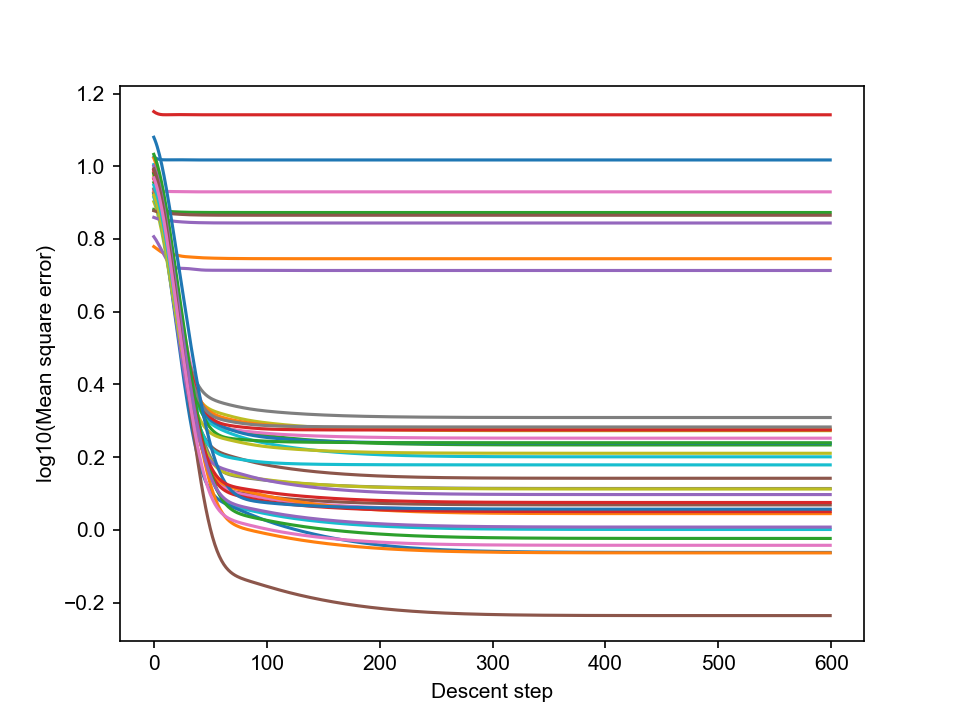

In [3]:
# Quantification
iq = ImageQuant2(
    img=imgs, roi=rois, cytbg=cytbg, membg=membg, pooling_rate=1, rol_ave=5, nfits=100
)
iq.quantify()
iq.plot_losses(log=True)

In [4]:
# iq.plot_fits()

In [5]:
# iq.plot_quantification()

In [6]:
# Compile and save results
res = iq.compile_res()
res["Membrane signal"] *= calibration_factor
res.to_csv("../../data/ring_ph_quantification.csv", index=False)

In [7]:
# Perform summary quantification
res = pd.read_csv("../../data/ring_ph_quantification.csv")
cyts = res.groupby("EmbryoID").apply(lambda x: np.mean(x["Cytoplasmic signal"]))
mems_tot = res.groupby("EmbryoID").apply(lambda x: np.mean(x["Membrane signal"]))
mems_ant = res.groupby("EmbryoID").apply(
    lambda x: bounded_mean_1d(x["Membrane signal"], (0.25, 0.75))
)
mems_post = res.groupby("EmbryoID").apply(
    lambda x: bounded_mean_1d(x["Membrane signal"], (0.75, 0.25))
)
asis = [(p - a) / (a + p) for a, p in zip(mems_ant, mems_post)]
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]
totals = cyts + 0.174 * mems_tot

df_dict = {
    "Path": paths,
    "Line": lines,
    "Condition": conditions,
    "Cyt": cyts,
    "Mem_tot": mems_tot,
    "Mem_ant": mems_ant,
    "Mem_post": mems_post,
    "ASI": asis,
    "Dosage": dosages,
    "Total": totals,
}
df = pd.DataFrame(df_dict)
df["Path"] = df["Path"].apply(lambda x: x[len(raw_data_path) :])
df.to_csv("../../data/ring_ph_embryos.csv")

### Remove polar body

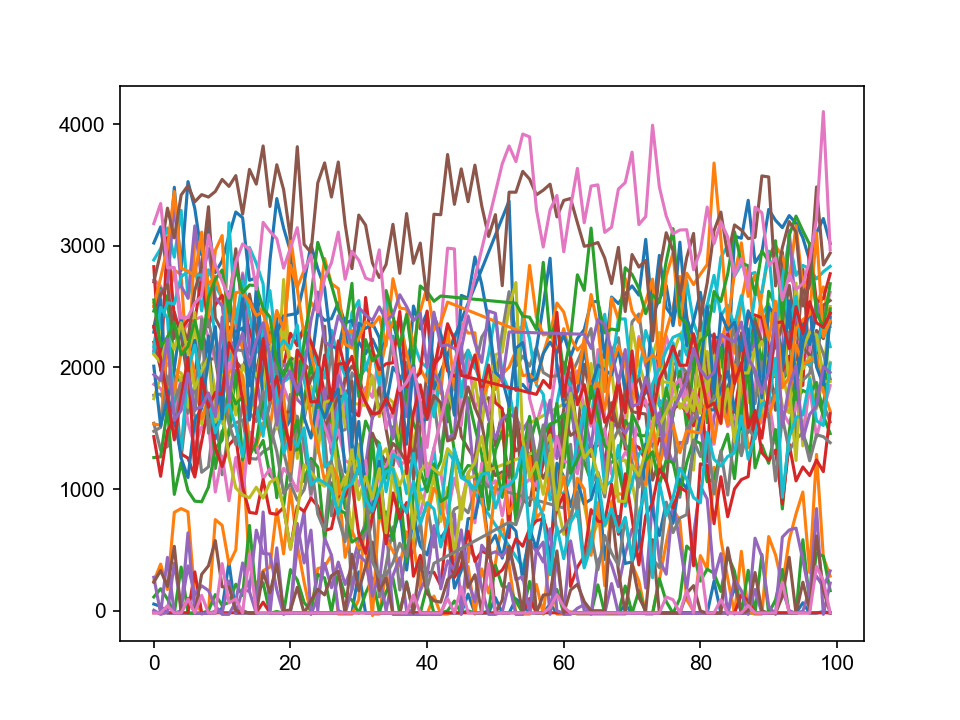

In [8]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]


fig, ax = plt.subplots()
res = pd.read_csv("../../data/ring_ph_quantification.csv")
res_grouped = res.groupby("EmbryoID")
for (g, r), p, roi in zip(res_grouped, paths, rois):
    _mems = r["Membrane signal"]
    mems = _mems.to_numpy()
    if os.path.exists(p + "/polar_body.txt"):
        polar_body = np.loadtxt(p + "/polar_body.txt")
        ind = int(
            100 * np.argmin(np.linalg.norm(roi - polar_body, axis=1)) / roi.shape[0]
        )
        mems[ind - 5 : ind + 5] = np.nan
        nans, x = nan_helper(mems)
        mems[nans] = np.interp(x(nans), x(~nans), mems[~nans])
    ax.plot(mems)
    res.loc[_mems.index, "Membrane signal"] = mems
res.to_csv("../../data/ring_ph_quantification_no_pb.csv", index=False)

In [9]:
# Perform summary quantification
res = pd.read_csv("../../data/ring_ph_quantification_no_pb.csv")
cyts = res.groupby("EmbryoID").apply(lambda x: np.mean(x["Cytoplasmic signal"]))
mems_tot = res.groupby("EmbryoID").apply(lambda x: np.mean(x["Membrane signal"]))
mems_ant = res.groupby("EmbryoID").apply(
    lambda x: bounded_mean_1d(x["Membrane signal"], (0.25, 0.75))
)
mems_post = res.groupby("EmbryoID").apply(
    lambda x: bounded_mean_1d(x["Membrane signal"], (0.75, 0.25))
)
asis = [(p - a) / (a + p) for a, p in zip(mems_ant, mems_post)]
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]
totals = cyts + 0.174 * mems_tot

df_dict = {
    "Path": paths,
    "Line": lines,
    "Condition": conditions,
    "Cyt": cyts,
    "Mem_tot": mems_tot,
    "Mem_ant": mems_ant,
    "Mem_post": mems_post,
    "ASI": asis,
    "Dosage": dosages,
    "Total": totals,
}
df = pd.DataFrame(df_dict)
df["Path"] = df["Path"].apply(lambda x: x[len(raw_data_path) :])
df.to_csv("../../data/ring_ph_embryos_no_pb.csv")